# Q2 Dry Bean Dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from keras.regularizers import l1
from numpy.random import seed


In [2]:
plt.style.use('default')
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rc('image', cmap='RdBu')
sns.set_palette('Reds')
seed(1)

In [3]:
def plot_confusion_matrix(model, X, y):
    y_pred = (model.predict(X)).argmax(axis=-1)
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', alpha=0.8, vmin=0)

In [4]:
def plot_accuracy(fit):
    plt.plot(fit.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [5]:
data = pd.read_excel('./data/Q2/Dry_Bean_Dataset.xlsx')


All the data is numerical, with exception of the target class which is categorical. This means we will be doing multiclass classification. Additionally, the range of each input variable differs greatly, indicating that normalisation may play a part in improving our classifier.

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [27]:

y = data[['Class']]
X = data.drop('Class', inplace=False, axis=1)

To investigate whether normalisation increases classification accuracy, two input sets will be used, one which is normalised, and one which isn't.

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

Before classification, the different target classes must be one hot encoded. This helps the NN identify different classes, rather than just encoding them as a numerical vector.

In [28]:
le = preprocessing.LabelEncoder()

y = le.fit_transform(y['Class'])

/Users/camlemessurier/Google Drive/Courses/4th Year/COMP3330/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The model below uses softmax

In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(600, input_shape=(16,), activation='relu'))
model.add(keras.layers.Dense(400, activation='relu', activity_regularizer=l1(0.001)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(300, activation='relu', activity_regularizer=l1(0.001)))
model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))

model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X, y, verbose=1, epochs=100)
history_norm = model.fit(X_norm, y, verbose=1, epochs=100, batch_size=200)

Epoch 1/10
69/69 [==============================] - 5s 42ms/step - loss: 0.9966 - accuracy: 0.6744
Epoch 2/10
69/69 [==============================] - 3s 42ms/step - loss: 0.3347 - accuracy: 0.9104
Epoch 3/10
69/69 [==============================] - 3s 43ms/step - loss: 0.2979 - accuracy: 0.9136
Epoch 4/10
69/69 [==============================] - 3s 37ms/step - loss: 0.2643 - accuracy: 0.9263
Epoch 5/10
69/69 [==============================] - 2s 32ms/step - loss: 0.2548 - accuracy: 0.9245
Epoch 6/10
69/69 [==============================] - 2s 33ms/step - loss: 0.2534 - accuracy: 0.9206
Epoch 7/10
69/69 [==============================] - 3s 38ms/step - loss: 0.2470 - accuracy: 0.9221
Epoch 8/10
69/69 [==============================] - 3s 39ms/step - loss: 0.2281 - accuracy: 0.9295
Epoch 9/10
69/69 [==============================] - 2s 33ms/step - loss: 0.2239 - accuracy: 0.9267
Epoch 10/10
69/69 [==============================] - 2s 34ms/step - loss: 0.2277 - accuracy: 0.9260


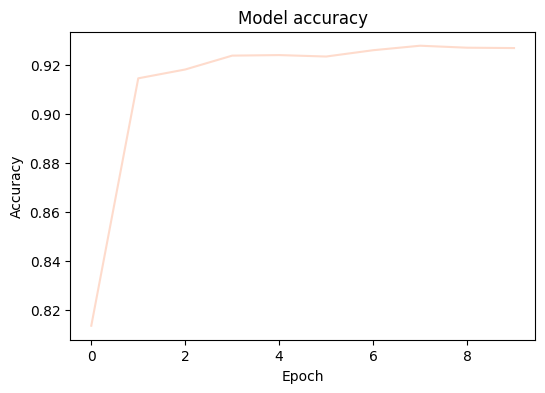

In [23]:
plot_accuracy(history_norm)

In [11]:
plot_accuracy(history)

NameError: name 'history' is not defined

In [24]:
def cvNN(X, y):

    cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cvscores = []
    for train, test in cv.split(X_norm, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(600, input_shape=(16,), activation='relu'))
        model.add(keras.layers.Dropout(0.1))
        model.add(keras.layers.Dense(400, activation='relu', activity_regularizer=l1(0.001)))
        model.add(keras.layers.Dropout(0.1))
        model.add(keras.layers.Dense(300, activation='relu', activity_regularizer=l1(0.001)))
        model.add(keras.layers.Dense(100, activation='relu'))
        model.add(keras.layers.Dropout(0.1))
        model.add(keras.layers.Dense(50, activation='relu'))

        model.add(keras.layers.Dense(7, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        fit = model.fit(X_norm[train], y[train], epochs=15, verbose=1)        
        scores = model.evaluate(X_norm[test], y[test])
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

        pred = model.predict(X_norm[test]).argmax(axis=-1)

    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

cvNN(X_norm, y)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(16,), activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
fit = model.fit(X_norm, y, epochs=40, verbose=0)

In [ ]:

plot_confusion_matrix(model, X_norm, y )


